In [21]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
import matplotlib.pyplot as plt
import shap
import pandas as pd

In [3]:
iris = load_iris()
X = iris.data
y = iris.target


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [6]:
y_pred = clf.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



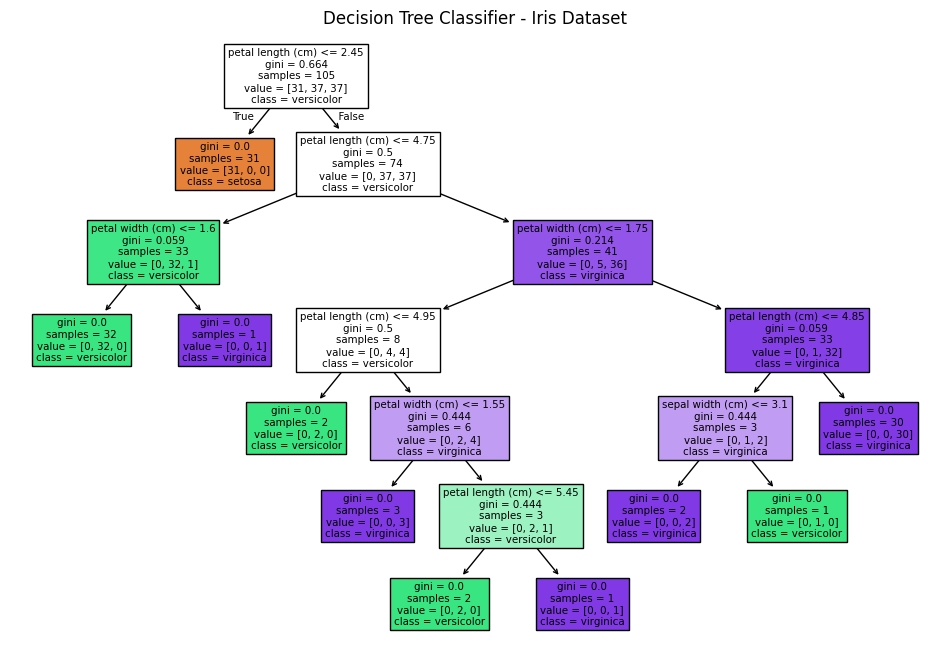

In [7]:
# Visualize the decision tree
plt.figure(figsize=(12,8))
tree.plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title("Decision Tree Classifier - Iris Dataset")
plt.show()

In [16]:
explainer = shap.TreeExplainer(clf, feature_names=iris.feature_names)
explanation = explainer(X)


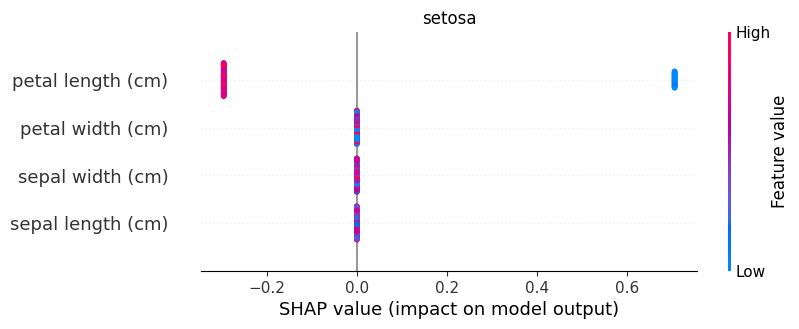

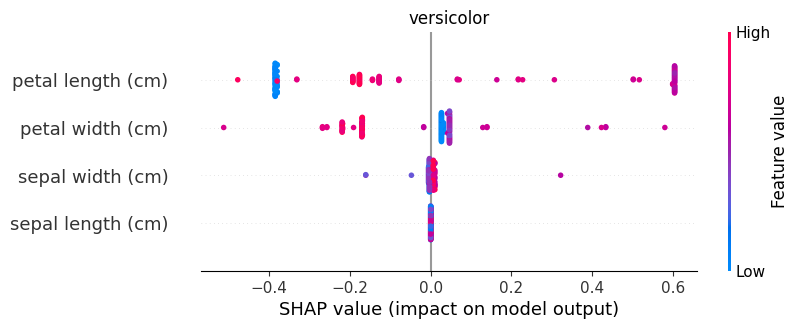

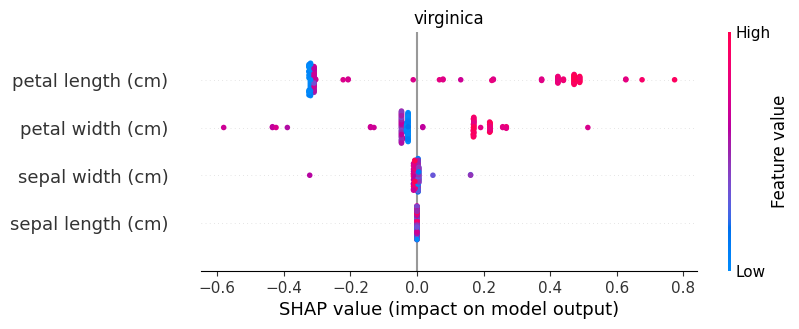

In [17]:
for i in range(len(iris.target_names)):
    plt.title(iris.target_names[i])
    shap.plots.beeswarm(explanation[:, :, i])

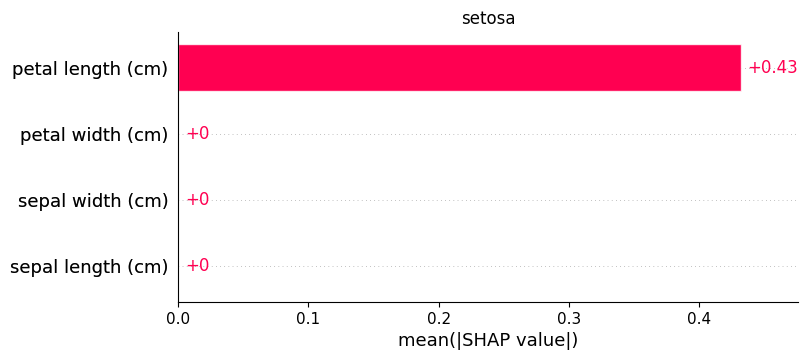

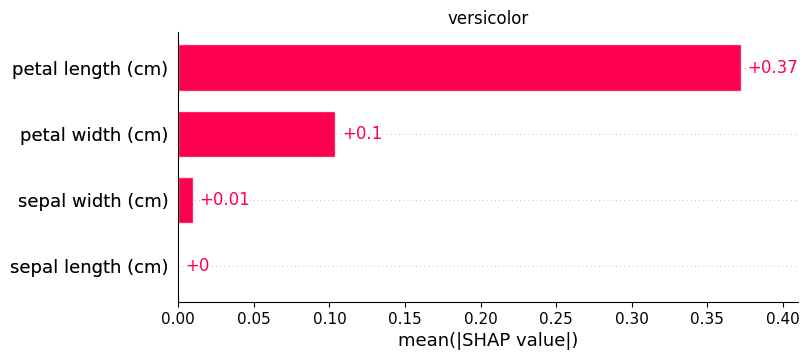

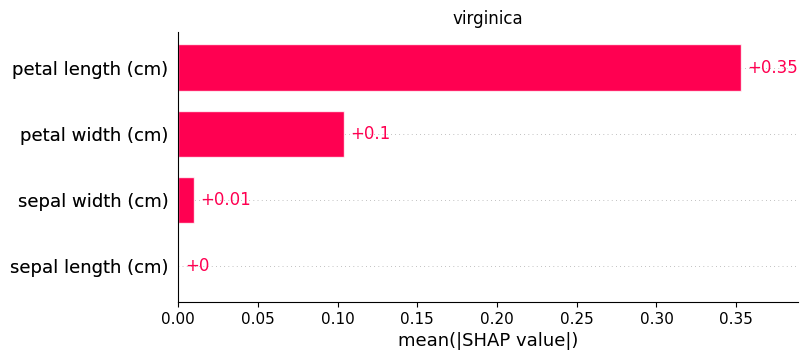

In [18]:
for i in range(len(iris.target_names)):
    plt.title(iris.target_names[i])
    shap.plots.bar(explanation[:, :, i])

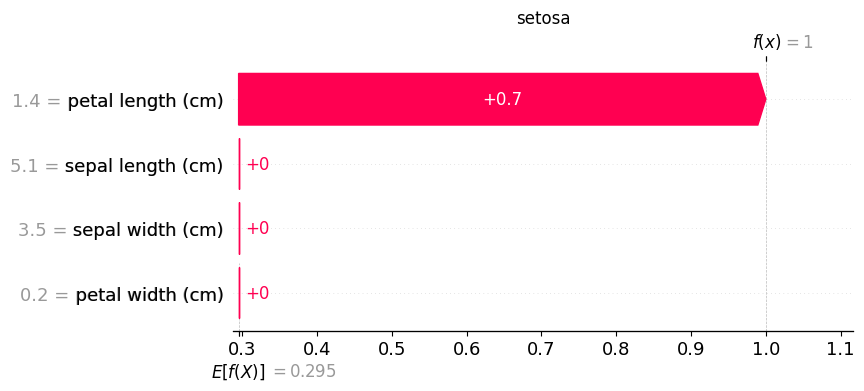

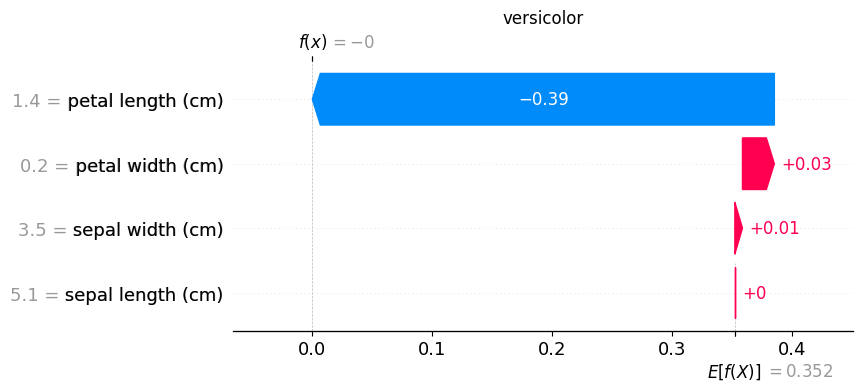

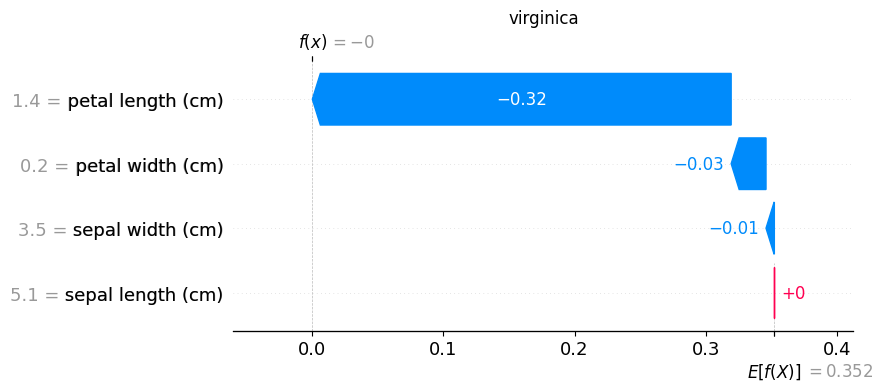

In [19]:
for i in range(len(iris.target_names)):
    plt.title(iris.target_names[i])
    shap.plots.waterfall(explanation[0, :, i])

In [38]:
iris_data = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_data['species'] = iris.target
target_mapping = {i: str(iris.target_names[i]) for i in range(len(iris.target_names))}
iris_data['species'] = iris_data['species'].map(target_mapping)

iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [40]:
str(iris_data.describe())

'       sepal length (cm)  sepal width (cm)  petal length (cm)  \\\ncount         150.000000        150.000000         150.000000   \nmean            5.843333          3.057333           3.758000   \nstd             0.828066          0.435866           1.765298   \nmin             4.300000          2.000000           1.000000   \n25%             5.100000          2.800000           1.600000   \n50%             5.800000          3.000000           4.350000   \n75%             6.400000          3.300000           5.100000   \nmax             7.900000          4.400000           6.900000   \n\n       petal width (cm)  \ncount        150.000000  \nmean           1.199333  \nstd            0.762238  \nmin            0.100000  \n25%            0.300000  \n50%            1.300000  \n75%            1.800000  \nmax            2.500000  '

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [44]:
print(confusion_matrix(y_test, y_pred))

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [45]:
accuracy_score(y_test, y_pred)

1.0

In [56]:
str(iris.target_names[clf.predict(X_test[0].reshape(1, -1))[0]])

'versicolor'

In [63]:
clf.predict_proba(X_test[0].reshape(1, -1))

array([[0., 1., 0.]])

In [64]:
type(clf)

sklearn.tree._classes.DecisionTreeClassifier